In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("listings.csv")

In [45]:
df

id                                      listing_url  \
0                 155548              https://www.airbnb.com/rooms/155548   
1                 162467              https://www.airbnb.com/rooms/162467   
2                 213371              https://www.airbnb.com/rooms/213371   
3                 214531              https://www.airbnb.com/rooms/214531   
4                   2818                https://www.airbnb.com/rooms/2818   
...                  ...                                              ...   
7603  905666980733146256  https://www.airbnb.com/rooms/905666980733146256   
7604  905731222562001828  https://www.airbnb.com/rooms/905731222562001828   
7605  906161615984076237  https://www.airbnb.com/rooms/906161615984076237   
7606  906312347067677212  https://www.airbnb.com/rooms/906312347067677212   
7607  906313802809767607  https://www.airbnb.com/rooms/906313802809767607   

           scrape_id last_scraped           source  \
0     20230605223331   2023-06-06  previous scrape   
1     20230605223331   2023-06-06      city scrape   
2     20230605223331   2023-06-06  previous scrape   
3     20230605223331   2023-06-06      city scrape   
4     20230605223331   2023-06-05      city scrape   
...              ...          ...              ...   
7603  20230605223331   2023-06-06      city scrape   
7604  20230605223331   2023-06-05      city scrape   
7605  20230605223331   2023-06-06      city scrape   
7606  20230605223331   2023-06-06      city scrape   
7607  20230605223331   2023-06-05      city scrape   

                                                   name  \
0     Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...   
1     Rental unit in Amsterdam · ★4.77 · 1 bedroom ·...   
2     Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...   
3     Rental unit in Amsterdam · ★4.82 · 1 bedroom ·...   
4     Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...   
...                                                 ...   
7603  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7604  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7605  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7606  Home in Amsterdam · ★New · 2 bedrooms · 2 beds...   
7607  Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...   

                                            description  \
0     Stay in one of the most vibrant neighborhoods ...   
1     Stylish (recently painted and redecorated) gro...   
2     De Pijp is a very popular area which has a lot...   
3     Just 1 minute from the Damsquare in Amsterdam ...   
4     Quiet Garden View Room & Super Fast Wi-Fi<br /...   
...                                                 ...   
7603  This beautiful holiday home in the popular Wes...   
7604  Welcome to our stylish and newly renovated, sp...   
7605  <b>License number</b><br />0363 DE11 2D1E E27B...   
7606  <b>Other things to note</b><br />The second be...   
7607  Stylish apartment in a relaxed neighborhood of...   

                                  neighborhood_overview  \
0                                                   NaN   
1     It's a quiet neigbourhood, with shops and rest...   
2                                                   NaN   
3     The small guesthouse is very central situated,...   
4     Indische Buurt ("Indies Neighborhood") is a ne...   
...                                                 ...   
7603                                                NaN   
7604  Our cozy Airbnb is situated in a lively neighb...   
7605  'De Baarsjes' is a cozy and vibrant neighborho...   
7606                                                NaN   
7607                                                NaN   

                                            picture_url    host_id  ...  \
0     https://a0.muscache.com/pictures/1044450/d99b2...     748161  ...   
1     https://a0.muscache.com/pictures/44305545/45b3...     776296  ...   
2     https://a0.muscache.com/pictures/2beb58b4-03c5...    1100324  ...   
3     https://a0.musc

In [46]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [47]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  7.608000e+03  7.608000e+03  7.608000e+03          7608.000000   
mean   2.328487e+17  2.023061e+13  1.032177e+08             2.676262   
std    3.489604e+17  2.121233e+00  1.393419e+08            15.422057   
min    2.818000e+03  2.023061e+13  3.159000e+03             1.000000   
25%    1.696009e+07  2.023061e+13  9.937172e+06             1.000000   
50%    3.822749e+07  2.023061e+13  3.501297e+07             1.000000   
75%    6.525168e+17  2.023061e+13  1.402245e+08             2.000000   
max    9.071470e+17  2.023061e+13  5.183111e+08           545.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                7608.000000                           0.0  7608.000000   
mean                    4.733964                           NaN    52.366725   
std                    28.091864                           NaN     0.017068   
min                     1.000000                           NaN    52.290340   
25%                     1.000000                           NaN    52.355890   
50%                     1.000000                           NaN    52.365980   
75%                     3.000000                           NaN    52.376470   
max                   741.000000                           NaN    52.425120   

         longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  7608.000000   7608.000000        0.0  ...                6893.000000   
mean      4.889936      2.904968        NaN  ...                   4.760825   
std       0.035059      1.353721        NaN  ...                   0.331667   
min       4.755710      1.000000        NaN  ...                   1.000000   
25%       4.866060      2.000000        NaN  ...                   4.670000   
50%       4.887770      2.000000        NaN  ...                   4.860000   
75%       4.908300      4.000000        NaN  ...                   5.000000   
max       5.026430     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            6893.000000                  6893.000000   
mean                4.879573                     4.894767   
std                 0.235863                     0.226818   
min                 1.000000                     1.000000   
25%                 4.850000                     4.880000   
50%                 4.960000                     4.980000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             6893.000000          6893.000000   
mean                 4.789198             4.637331   
std                  0.265175             0.324671   
min                  1.000000             1.000000   
25%                  4.680000             4.500000   
50%                  4.860000             4.680000   
75%                  5.000000             4.830000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     7608.000000   
mean                         1.798896   
std                          2.590756   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          1.000000   
max                         22.000000   

       calculated_host_listings_count_entire_homes  \
count                                  7608.000000   
mean                                      1.081493   
std                                       1.583132   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                      16.000000   

       calculated_host_listings_count_private_room

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   int64  
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   int64  
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

In [49]:
#drop null columns
df.drop(['neighbourhood_group_cleansed' , 'calendar_updated' , 'bathrooms'], axis =1 , inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   int64  
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   int64  
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

In [22]:
# Set display options to show all rows and columns without truncation
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)  # Adjust display width if needed

# Display the DataFrame without truncation
print(df)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
#Count Null values in each column
df.isna().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               710
Length: 72, dtype: int64

In [52]:
# fill null values in columns if its sum is greater than 750 and drop others 
for col in df.columns:
    if (df[col].isna().sum() > 750) :
        if df[col].dtype == 'object':
                mode_value = df[col].mode()[0]  # Mode for object columns
                df[col].fillna(mode_value, inplace=True)         
        else: 
                mean_value = df[col].mean()  # Mean for numeric columns
                df[col].fillna(mean_value, inplace=True)
    else :
        df[col].dropna()
        
                
           

In [84]:
# Remove the dollar sign from the 'price' column
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

df['price']

0       200.0
1       170.0
2       270.0
3       115.0
4        69.0
        ...  
7603    500.0
7604    190.0
7605    359.0
7606    223.0
7607    139.0
Name: price, Length: 7608, dtype: float64

In [54]:
df['host_is_superhost'].value_counts()

f    6665
t     943
Name: host_is_superhost, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   int64  
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   int64  
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         7608 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

In [56]:
df.shape

(7608, 72)

In [57]:
df

id                                      listing_url  \
0                 155548              https://www.airbnb.com/rooms/155548   
1                 162467              https://www.airbnb.com/rooms/162467   
2                 213371              https://www.airbnb.com/rooms/213371   
3                 214531              https://www.airbnb.com/rooms/214531   
4                   2818                https://www.airbnb.com/rooms/2818   
...                  ...                                              ...   
7603  905666980733146256  https://www.airbnb.com/rooms/905666980733146256   
7604  905731222562001828  https://www.airbnb.com/rooms/905731222562001828   
7605  906161615984076237  https://www.airbnb.com/rooms/906161615984076237   
7606  906312347067677212  https://www.airbnb.com/rooms/906312347067677212   
7607  906313802809767607  https://www.airbnb.com/rooms/906313802809767607   

           scrape_id last_scraped           source  \
0     20230605223331   2023-06-06  previous scrape   
1     20230605223331   2023-06-06      city scrape   
2     20230605223331   2023-06-06  previous scrape   
3     20230605223331   2023-06-06      city scrape   
4     20230605223331   2023-06-05      city scrape   
...              ...          ...              ...   
7603  20230605223331   2023-06-06      city scrape   
7604  20230605223331   2023-06-05      city scrape   
7605  20230605223331   2023-06-06      city scrape   
7606  20230605223331   2023-06-06      city scrape   
7607  20230605223331   2023-06-05      city scrape   

                                                   name  \
0     Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...   
1     Rental unit in Amsterdam · ★4.77 · 1 bedroom ·...   
2     Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...   
3     Rental unit in Amsterdam · ★4.82 · 1 bedroom ·...   
4     Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...   
...                                                 ...   
7603  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7604  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7605  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
7606  Home in Amsterdam · ★New · 2 bedrooms · 2 beds...   
7607  Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...   

                                            description  \
0     Stay in one of the most vibrant neighborhoods ...   
1     Stylish (recently painted and redecorated) gro...   
2     De Pijp is a very popular area which has a lot...   
3     Just 1 minute from the Damsquare in Amsterdam ...   
4     Quiet Garden View Room & Super Fast Wi-Fi<br /...   
...                                                 ...   
7603  This beautiful holiday home in the popular Wes...   
7604  Welcome to our stylish and newly renovated, sp...   
7605  <b>License number</b><br />0363 DE11 2D1E E27B...   
7606  <b>Other things to note</b><br />The second be...   
7607  Stylish apartment in a relaxed neighborhood of...   

                                  neighborhood_overview  \
0     Traditionally a blue collar neighbourhood just...   
1     It's a quiet neigbourhood, with shops and rest...   
2     Traditionally a blue collar neighbourhood just...   
3     The small guesthouse is very central situated,...   
4     Indische Buurt ("Indies Neighborhood") is a ne...   
...                                                 ...   
7603  Traditionally a blue collar neighbourhood just...   
7604  Our cozy Airbnb is situated in a lively neighb...   
7605  'De Baarsjes' is a cozy and vibrant neighborho...   
7606  Traditionally a blue collar neighbourhood just...   
7607  Traditionally a blue collar neighbourhood just...   

                                            picture_url    host_id  ...  \
0     https://a0.muscache.com/pictures/1044450/d99b2...     748161  ...   
1     https://a0.muscache.com/pictures/44305545/45b3...     776296  ...   
2     https://a0.muscache.com/pictures/2beb58b4-03c5...    1100324  ...   
3     https://a0.musc

In [58]:
# Visualization  ( Histogram for some columns )
Features = ['host_total_listings_count' , 'number_of_reviews' , 'review_scores_rating',
            'review_scores_accuracy','calculated_host_listings_count', 'reviews_per_month','price']

array([[<Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'review_scores_rating'}>],
       [<Axes: title={'center': 'review_scores_accuracy'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

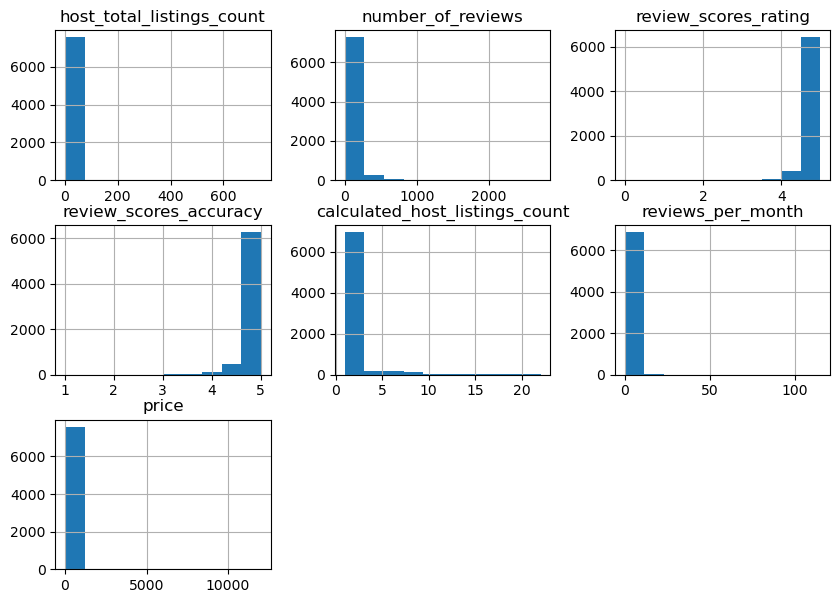

In [59]:
df[Features].hist(figsize=(10,7))

<Axes: xlabel='host_is_superhost', ylabel='count'>

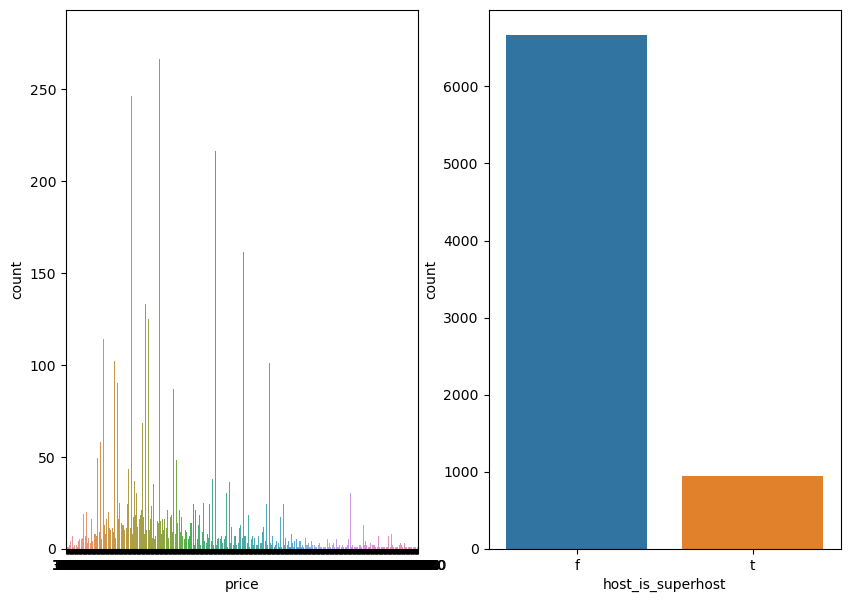

In [67]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7)) 
sns.countplot(x='price',data=df,ax=axes[0]) 
sns.countplot(x='host_is_superhost',data=df,ax=axes[1])

In [86]:
import plotly.express as px 
fig = px.pie(df,values='host_acceptance_rate',names='host_is_superhost') 
fig.show()

C:\Users\ASG\AppData\Local\Temp\ipykernel_16980\1374433855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

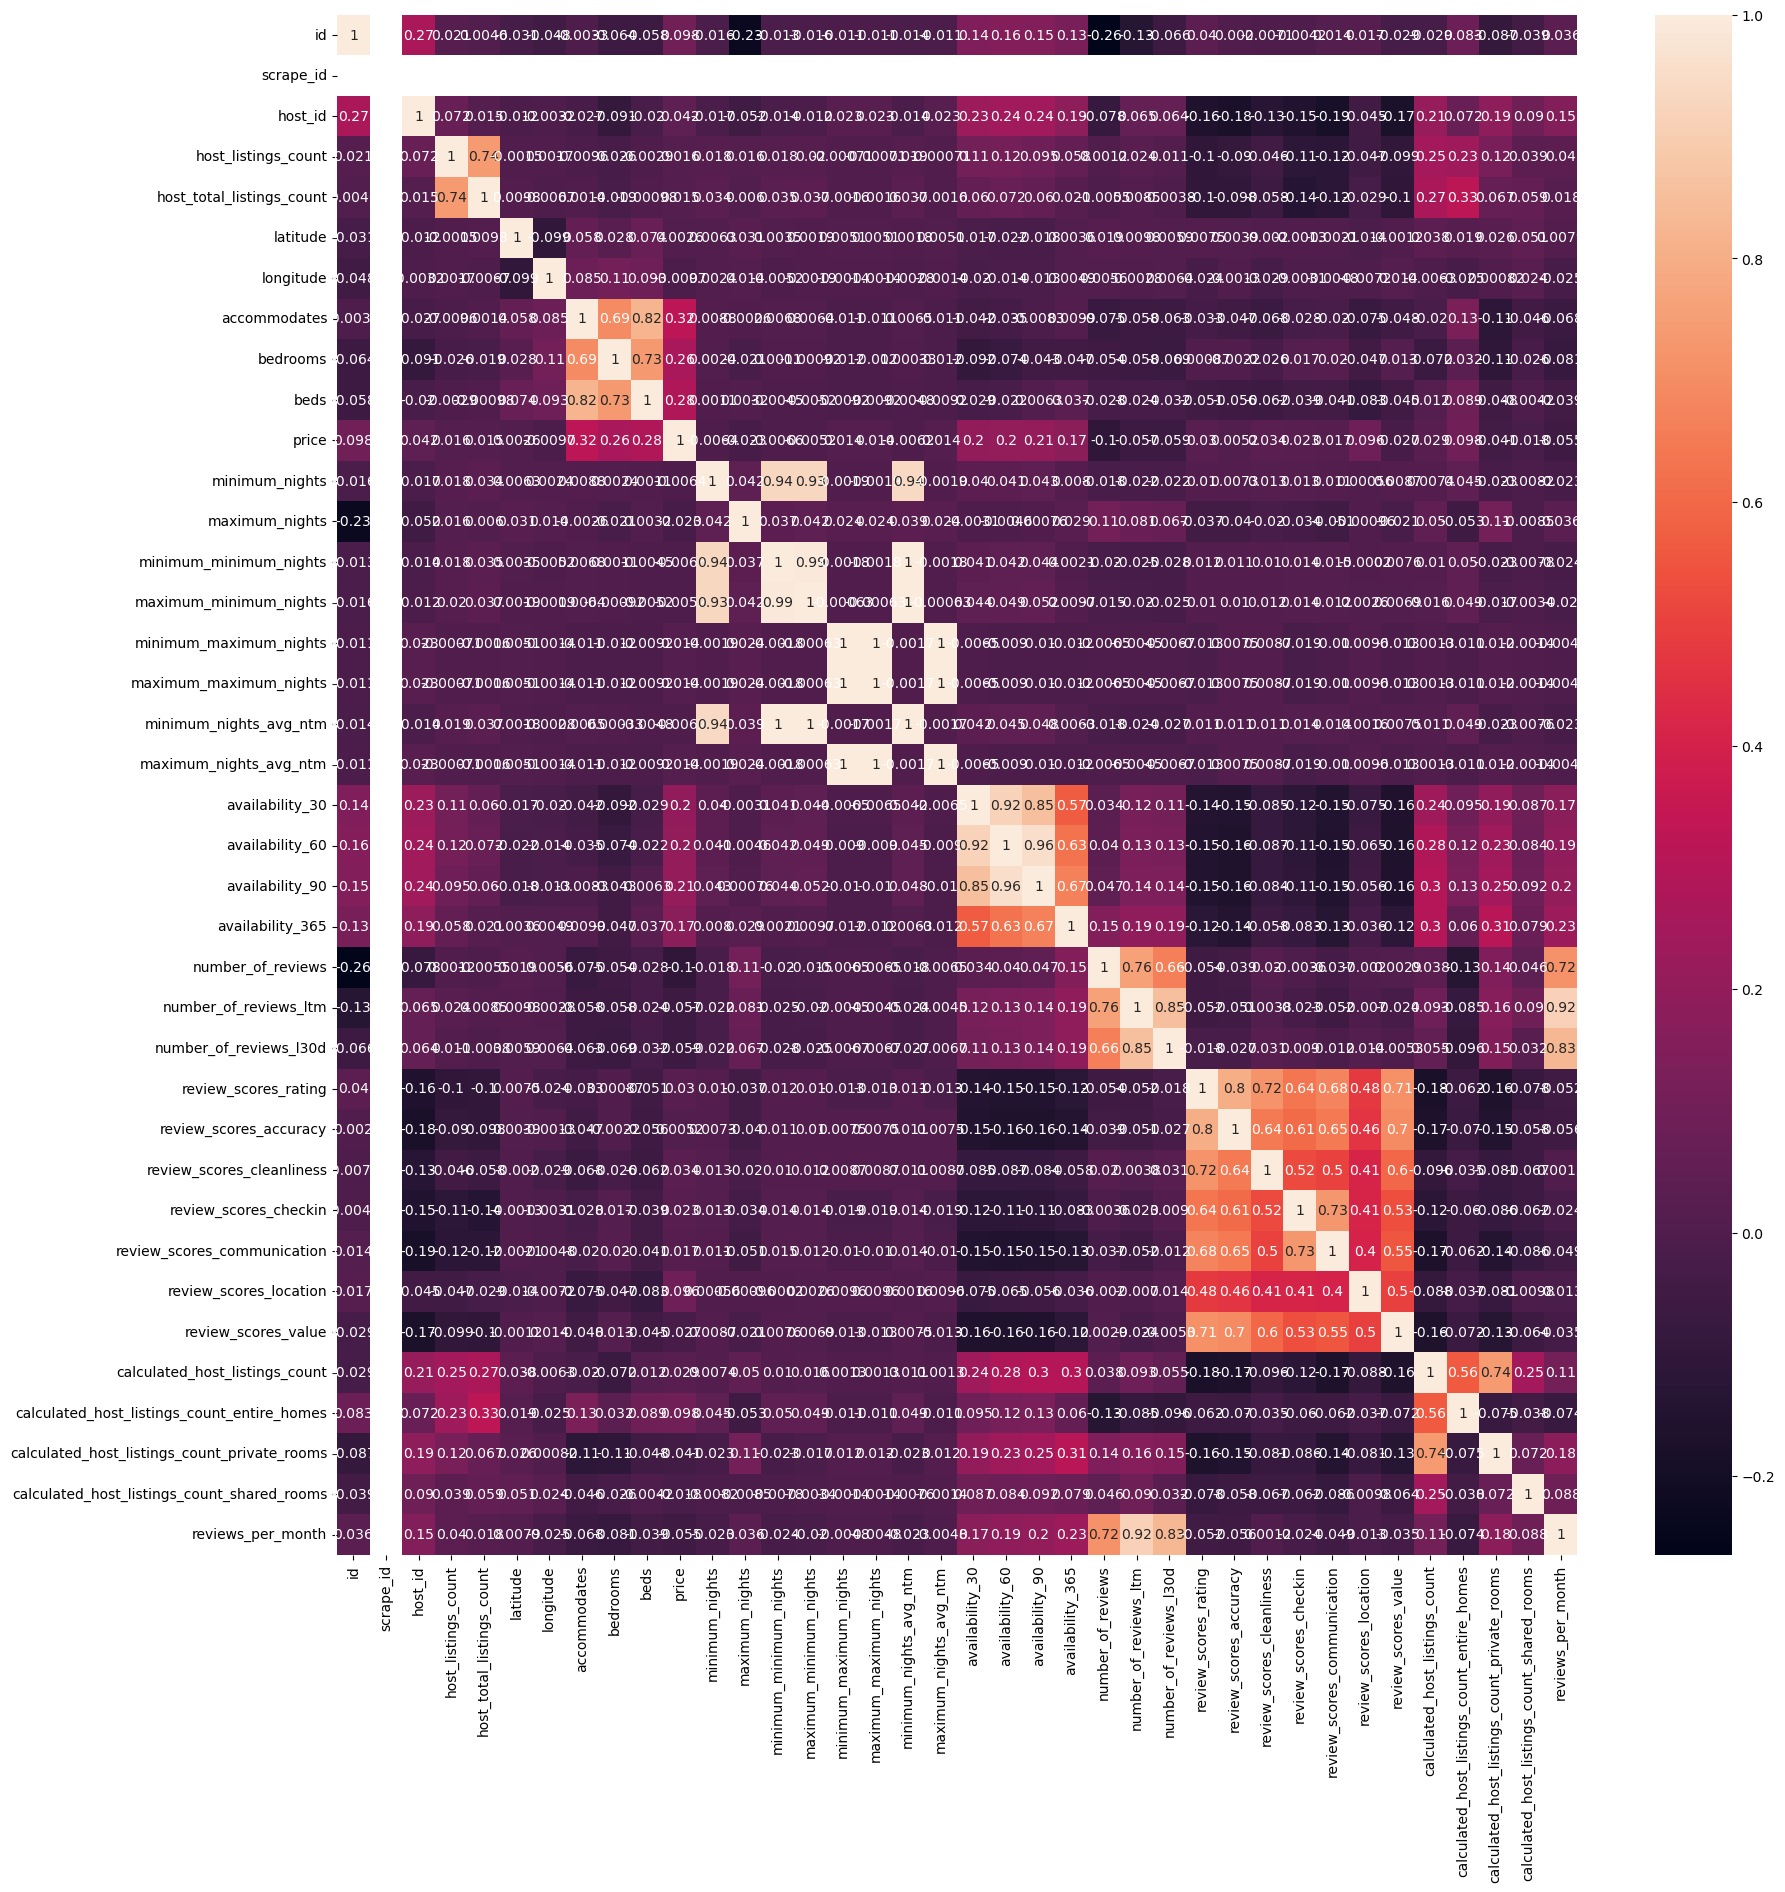

In [76]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True)

In [77]:
#drop null columns
df.drop(['minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights',
         'minimum_nights_avg_ntm','maximum_nights_avg_ntm',], axis =1 , inplace = True)

In [79]:
df.shape

(7608, 66)

In [80]:
paired_features = ['bedrooms','has_availability','room_type','accommodates','price',
                   'calculated_host_listings_count','number_of_reviews']

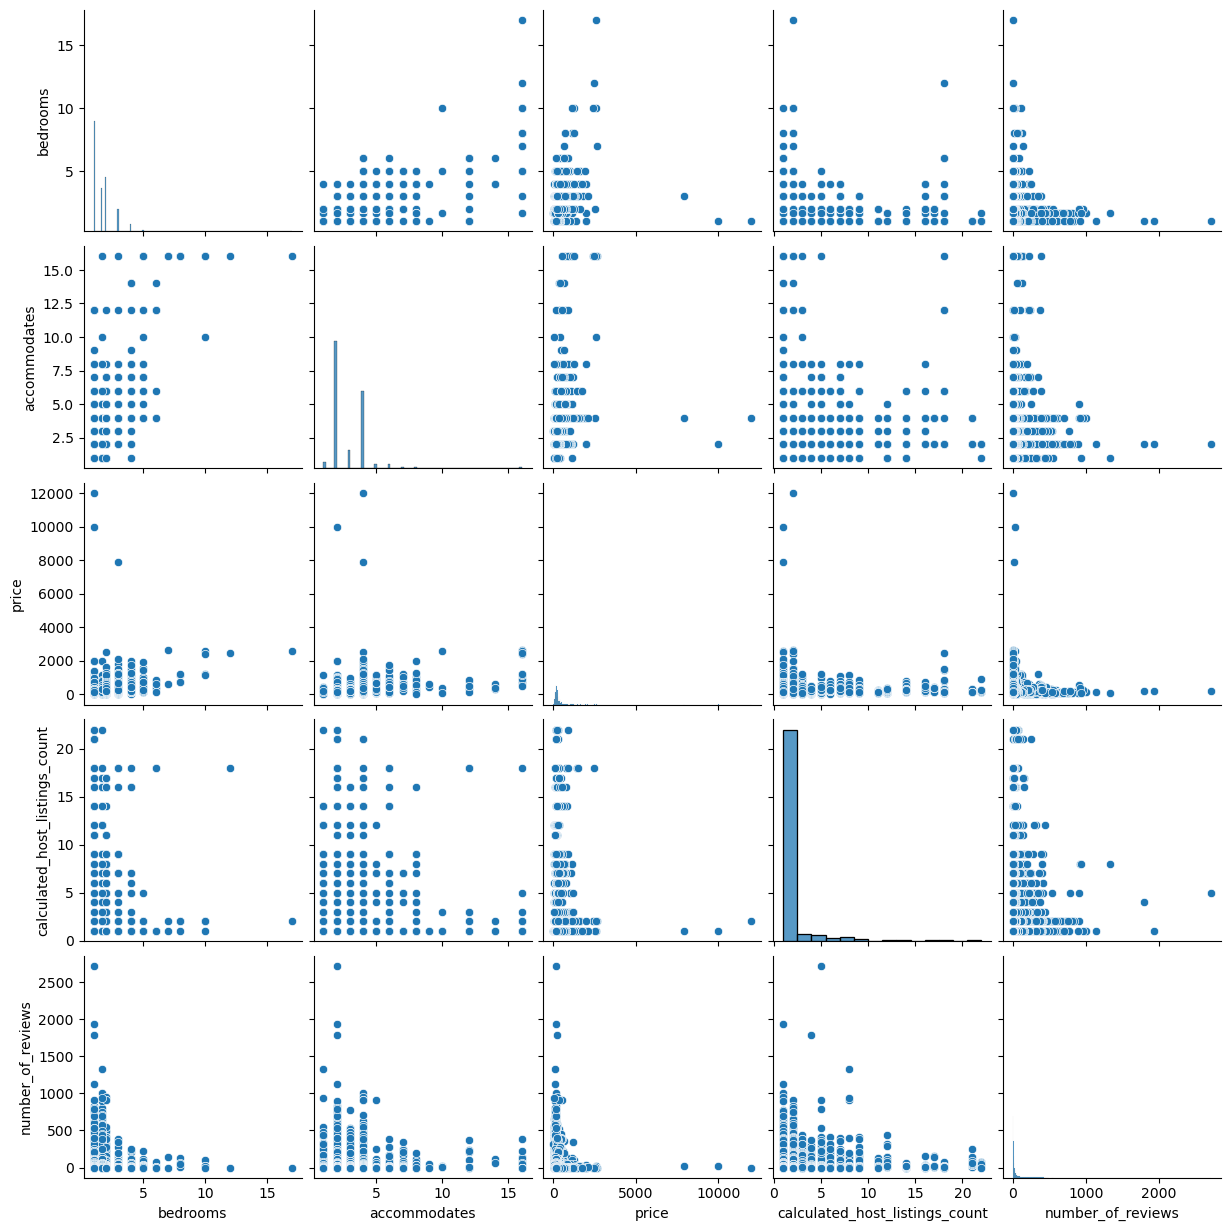

In [82]:
sns.pairplot(df[paired_features])